_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               201488    
Total params: 419,120
Trainable params: 419,120
Non-trainable params: 0
_________________________________________________________________

(60000, 784)
(10000, 784)


Epoch 1/25
60000/60000 [==============================] - 20s 340us/step - loss: 0.0314 - acc: 0.0097
Epoch

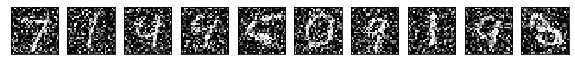

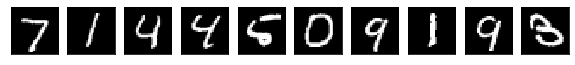

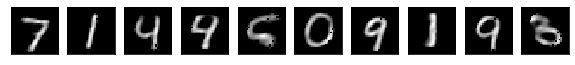

In [6]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding = 32

# this is our input placeholder
#use the funcional API of keras , because we want detachable network

inp = Input(shape =(784,)) # takes dimension first, then the instance.. in RNN ulta

# "hidden1" 

hidden1 = Dense(256,activation="relu")(inp)

#Encoded

code = Dense(encoding,activation="relu")(hidden1)

#Decoder hidden1 (actually hidden3)

hidden2 = Dense(256,activation="relu")(code)

#Output layer

out = Dense(784,activation="relu")(hidden2)

# this model maps an input to its reconstruction

autoencoder = Model(inp,out)

#Summary

autoencoder.summary()

#compile
autoencoder.compile(loss="mse",optimizer="adam",metrics=["accuracy"])
#prepare the data
(x_train, _), (x_test, _) = mnist.load_data()

#normalize the values (between 0 and 1)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test),784))
print(x_train.shape)
print(x_test.shape)

#Add noise now. 
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#train
autoencoder.fit(x_train_noisy,x_train,epochs=25)

#PLOTTING
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(10, 4))
for i in range(n):
    # display noisy input (contaminated)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i*2].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.show()

#Actual images
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i*2].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.imshow()

#predict images
plt.figure(figsize=(10, 4))
for i in range(n):
    # display predicted
    ax = plt.subplot(2, n, i + 1)
    outimg = autoencoder.predict([[x_test_noisy[i*2]]])
    plt.imshow(outimg.reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#plt.imshow()

#Print the decoded images (use the trained network)